In [58]:
import numpy as np
import matplotlib.pyplot as plt
import json, argparse
import mplhep as hep

combine_direc = "/vols/cms/emc21/FCC/FCC-Study/runs/e240_full_run_fixedLumis/run1/combine_grid_space_2.5"
lumi = 10.8
skipSigmaBands = False

In [59]:
def fillMissingLimits(limits):
    for val in ['0.03', '0.16', '0.5', '0.84', '0.97']:
        if val not in limits:
            limits[val] = 0
    
    return limits




with open(f"{combine_direc}/all_limits.json", "r") as f:
    all_limits = json.load(f)


# make the grid
all_ms = np.loadtxt(f"{combine_direc}/mass_scan.txt")

mHs = np.unique(all_ms[:, 0])
# For a single mH, get the values of mA - mH
diff_scan = all_ms[all_ms[:, 0] == mHs[0], 1] - mHs[0]

# Now need to make a 2d grid to store the limits
grid = np.zeros((len(diff_scan), len(mHs)))


plot_grid = np.ones((len(diff_scan)+1, len(mHs))) * -1
plot_grid_for_contour = np.ones((len(diff_scan)+1, len(mHs))) * 10      
plot_grid_for_up_contour = np.ones((len(diff_scan)+1, len(mHs))) * 10 
plot_grid_for_down_contour = np.ones((len(diff_scan)+1, len(mHs))) * 10 



In [60]:
def fillMissingLimits(limits):
    for val in ['0.03', '0.16', '0.5', '0.84', '0.97']:
        if val not in limits:
            limits[val] = 0
    
    return limits




with open(f"{combine_direc}/all_limits.json", "r") as f:
    all_limits = json.load(f)


# make the grid
all_ms = np.loadtxt(f"{combine_direc}/mass_scan.txt")

mHs = np.unique(all_ms[:, 0])
# For a single mH, get the values of mA - mH
diff_scan = all_ms[all_ms[:, 0] == mHs[0], 1] - mHs[0]

# Now need to make a 2d grid to store the limits
grid = np.zeros((len(diff_scan), len(mHs)))


plot_grid = np.ones((len(diff_scan)+1, len(mHs))) * -1
plot_grid_for_contour = np.ones((len(diff_scan)+1, len(mHs))) * 10      
plot_grid_for_up_contour = np.ones((len(diff_scan)+1, len(mHs))) * 10 
plot_grid_for_down_contour = np.ones((len(diff_scan)+1, len(mHs))) * 10 

for mass_point, limit_dict in all_limits.items():

    mH = float(mass_point.split("_")[0].split("mH")[1])
    mA = float(mass_point.split("mA")[1])

    if mA - mH <= 30:
        # if small mass splitting then use the muon limits
        limits = limit_dict["MuMu"]
    else:

        try:
            limits = limit_dict['combined']
        except:
            limits = limit_dict["MuMu"]


    
    # limits = f["limit"]["limit"].array()
    limits = fillMissingLimits(limits)

    # #! To change, this is just for Mu-Mu case
    # limits = limit_dict["MuMu"]

    try:
        limit = limits['0.5']
    except:
        print(f"Couldn't find 0.5 limit for {mass_point}, skipping for now")
        limits = {
            0.5 : 0, 0.84 : 0, 0.16 : 0
        }
        # continue


    deltaAH = int(mA - mH)

    #row_idx = 100 - deltaAH
    #col_idx = mH - 70
    row_idx = len(diff_scan) - np.where(diff_scan == mA - mH)[0][0]
    col_idx = np.where(mHs == mH)[0][0]

    #print(mH, mA, deltaAH)  

    #print(row_idx, col_idx)

    plot_grid[row_idx, col_idx] = limit

    plot_grid_for_contour[row_idx, col_idx] = limit

    plot_grid_for_up_contour[row_idx, col_idx] = limits['0.84']
    plot_grid_for_down_contour[row_idx, col_idx] = limits['0.16']

    


In [61]:
plot_grid.shape

(46, 25)

In [62]:
len(mHs)

25

In [63]:
mHs

array([ 50. ,  52.5,  55. ,  57.5,  60. ,  62.5,  65. ,  67.5,  70. ,
        72.5,  75. ,  77.5,  80. ,  82.5,  85. ,  87.5,  90. ,  92.5,
        95. ,  97.5, 100. , 102.5, 105. , 107.5, 110. ])

In [64]:
len(diff_scan)

45

In [65]:
diff_scan

array([ 10. ,  12.5,  15. ,  17.5,  20. ,  22.5,  25. ,  27.5,  30. ,
        32.5,  35. ,  37.5,  40. ,  42.5,  45. ,  47.5,  50. ,  52.5,
        55. ,  57.5,  60. ,  62.5,  65. ,  67.5,  70. ,  72.5,  75. ,
        77.5,  80. ,  82.5,  85. ,  87.5,  90. ,  92.5,  95. ,  97.5,
       100. , 102.5, 105. , 107.5, 110. , 112.5, 115. , 117.5, 120. ])

In [56]:
355/2

177.5

In [66]:
dx = (mHs[1]-mHs[0])/2.
dy = (diff_scan[1]-diff_scan[0])/2.
extent = [mHs[0]-dx, mHs[-1]+dx, diff_scan[0]-dy, diff_scan[-1]+dy]

extent

[48.75, 111.25, 8.75, 121.25]

In [70]:
ecom =  240

In [75]:
max_mH = (ecom - np.min(diff_scan)) / 2
max_mH

115.0

In [76]:
355 / 2

177.5

In [77]:
177.5 + 177.5 + 10

365.0

In [ ]:
ecom - 2 * np.min(mHs)

(10.0, 140.0)

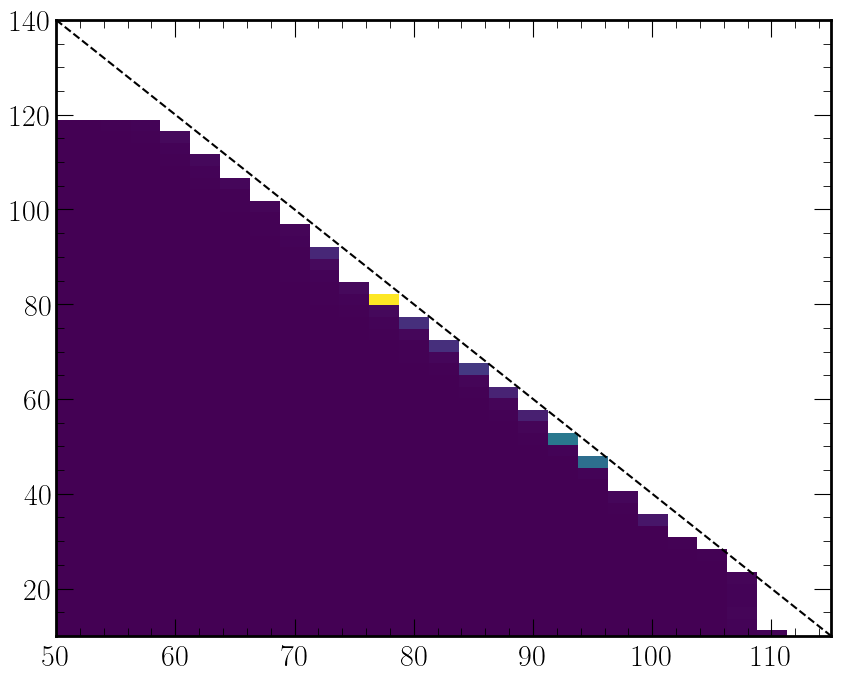

In [72]:
fig, ax = plt.subplots(figsize=(10,8))
cmap = plt.cm.viridis
cmap.set_bad(color='white')
masked_array = np.ma.masked_where(plot_grid == -1, plot_grid)
im = ax.imshow(masked_array, cmap = cmap, aspect='auto', extent=extent)


max_mH = (ecom - np.min(diff_scan)) / 2
line = plt.plot([np.min(mHs), max_mH], [ecom - 2 * np.min(mHs), np.min(diff_scan)], color='black', linestyle='--', label = '$M_H$ + $M_A$ = 240 GeV')

# plt.xlim(min(mHs), max(mHs))
# plt.ylim(min(diff_scan), max(diff_scan))

plt.xlim(np.min(mHs), max_mH)
plt.ylim(np.min(diff_scan), ecom - 2 * np.min(mHs))

# plt.xlabel("$M_H$ [GeV]")
# plt.ylabel("$M_A - M_H$ [GeV]")

In [36]:
dir(im.axes)

['ArtistList',
 '_AxesBase__clear',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autotitlepos',
 '_axes',
 '_axes_locator',
 '_axis_map',
 '_axis_names',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_children',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_colorbars',
 '_convert_dx',
 '_current_image',
 '_different_canvas',
 '_errorevery_to_mask',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_fully_clipped_to_axes',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spine

In [38]:
dir(im.axes.yaxis)

['OFFSETTEXTPAD',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alpha',
 '_animated',
 '_autolabelpos',
 '_autoscale_on',
 '_axes',
 '_callbacks',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_copy_tick_props',
 '_different_canvas',
 '_format_with_dict',
 '_fully_clipped_to_axes',
 '_get_autoscale_on',
 '_get_axis_name',
 '_get_shared_axes',
 '_get_shared_axis',
 '_get_tick',
 '_get_tick_boxes_siblings',
 '_get_tick_label_size',
 '_get_ticklabel_bboxes',
 '_get_ticks_position',
 '_gid',
 '_in_layout',
 '_init',
 '_internal_update',
 '_label',
 '_major_tick_kw',
 '_minor_tick_kw',
 '_mouseove

In [14]:
print(plot_grid)

[[-1.         -1.         -1.         ... -1.         -1.
  -1.        ]
 [ 0.40234375  0.37597656  0.40625    ... -1.         -1.
  -1.        ]
 [ 0.36425781  0.34863281  0.37402344 ... -1.         -1.
  -1.        ]
 ...
 [ 0.04833984  0.04785156  0.05029297 ...  0.14208984  0.15087891
   0.16259766]
 [ 0.05322266  0.05273438  0.05517578 ...  0.15820312  0.16845703
   0.18212891]
 [ 0.05957031  0.05810547  0.05908203 ...  0.17919922  0.19091797
   0.20800781]]


Text(0.5, 0.73, '\\begin{eqnarray*}\\textit{limit} = \\Biggl\\{  \\begin{array}{l} e\\textit{-}e/\\mu\\textit{-}\\mu \\quad \\textit{if}\\ \\quad \\Delta(M_A,M_H) \\geq 30 GeV\\\\  \\mu\\textit{-}\\mu \\quad \\quad \\; \\; \\, \\textit{if}\\ \\quad \\Delta(M_A,M_H) < 30 GeV\\end{array}\\end{eqnarray*}')

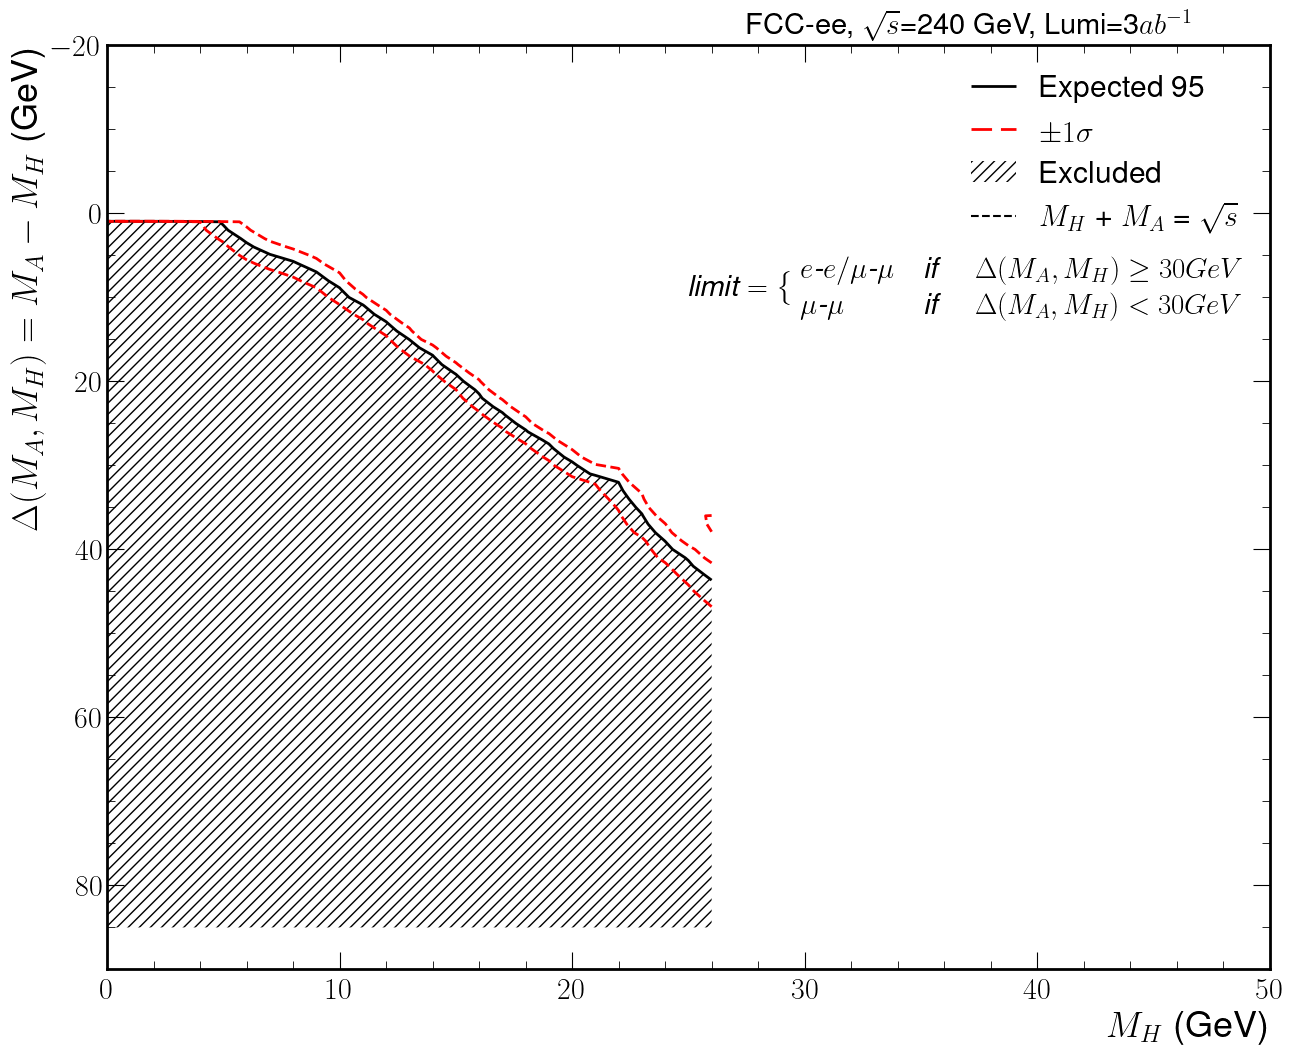

In [11]:
import mplhep as hep

plt.style.use(hep.style.CMS)
plt.rcParams['text.usetex'] = True

fig, ax = plt.subplots(figsize=(15,12))

cmap = plt.cm.viridis
cmap.set_bad(color='white')
masked_array = np.ma.masked_where(np.ones_like(plot_grid) * -1 == -1, plot_grid)
im = ax.imshow(masked_array, cmap = cmap, aspect='auto')

# line = plt.plot([0, 25], [-7, 45], color='black', linestyle='--', label = '$M_H$ + $M_A$ = 240 GeV')

# Show all ticks and label them with the respective list entries
# yticks_loc = np.arange(-7, 46, 2)
# yticks_names = np.arange(140, 5, -5) #np.arange(20, 102, 2)#diff_scan -1 #np.arange(20, 105, 5)
# ax.set_yticks(yticks_loc, labels=yticks_names)
# xticks_loc = np.arange(0, 27, 2)
# xticks_names = np.arange(50, 120, 5)
# ax.set_xticks(xticks_loc, labels=xticks_names)



plt.ylim(90, -20)


# # plt.ylim(41, 0)
plt.xlim(0, 50)


#plt.contour(plot_grid, np.array([1]) , colors=['yellow'], linewidths=[5])

con = plt.contour(plot_grid_for_contour, np.array([1]) , colors=['black'], linewidths=[2])
handles_con, labels = con.legend_elements()

con_filled = plt.contourf(plot_grid_for_contour, np.array([0, 1]), colors=['white', 'white'],
                hatches = ['///', '//////'], levels=[0, 1], alpha=0.5)
handles_con_filled, labels_filled = con_filled.legend_elements()

if not skipSigmaBands:
    con_up = plt.contour(plot_grid_for_up_contour, np.array([1]) , colors=['red'], 
                        linewidths=[2], linestyles=['--'])
    handles_con_up, labels_con_up = con_up.legend_elements()

    con_down = plt.contour(plot_grid_for_down_contour, np.array([1]) , colors=['red'], 
                        linewidths=[2], linestyles=['--'])
    handles_con_down, labels_con_down = con_down.legend_elements()

    ax.legend(handles_con + handles_con_up + handles_con_filled  + line,
            ["Expected 95% CL", "$\pm 1 \sigma$", "Excluded", '$M_H$ + $M_A$ = $\sqrt{s}$'], 
            loc='upper right')

else:
    ax.legend(handles_con + handles_con_filled  + line,
            ["Expected 95% CL", "Excluded", '$M_H$ + $M_A$ = $\sqrt{s}$'], 
            loc='upper right')

plt.xlabel("$M_H$ (GeV)")
plt.ylabel(r"$\Delta(M_A,M_H) = M_A - M_H$ (GeV)")   


plt.text(0.55, 1.013, r"FCC-ee,  $\sqrt{s}$=240 GeV,  " + f"Lumi={lumi}" + "$ab^{-1}$", fontsize="21",
             transform=ax.transAxes)

# Plot diagonal line for mA + mH = 240
#plt.plot([25, 0], [0, 25], color='black', linestyle='--')


eq1 = (r"\begin{eqnarray*}"
        r"\textit{limit} = \Biggl\{"
        r"  \begin{array}{l}"
        r" e\textit{-}e/\mu\textit{-}\mu \quad \textit{if}\ \quad \Delta(M_A,M_H) \geq 30 GeV\\"
        r"  \mu\textit{-}\mu \quad \quad \; \; \, \textit{if}\ \quad \Delta(M_A,M_H) < 30 GeV"
        r"\end{array}"
       r"\end{eqnarray*}")
plt.text(0.5, 0.73, eq1, fontsize="21",
             transform=ax.transAxes)